In [1]:
import warnings as _wrn
import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

_wrn.filterwarnings('always')
_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc
import eQTLseq.utils as _utils

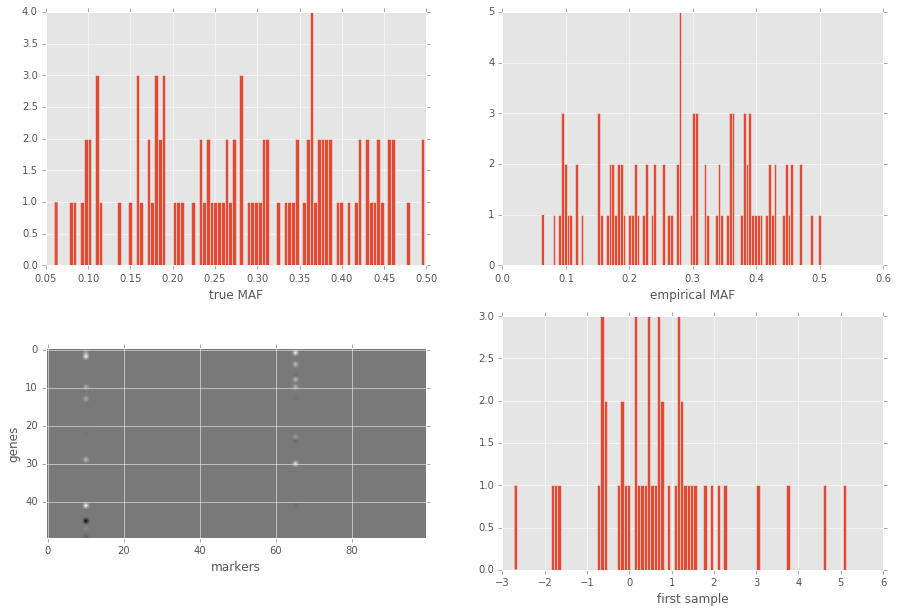

In [7]:
n_samples = 1000
n_markers = 100
n_markers_causal = 2
n_genes = 50
n_genes_affected = 10

data_geno = _assoc.simulate_genotypes(n_samples, n_markers, MAF_range=[0.05, 0.5])
data_pheno = _assoc.simulate_eQTL_normal(data_geno['G'], n_markers_causal, n_genes, n_genes_affected, s2e=1, h2=0.5)

_plt.figure(figsize = (15,10));
_plt.subplot(2,2,1); _plt.hist(data_geno['MAF'], 100); _plt.xlabel('true MAF')
_plt.subplot(2,2,2); _plt.hist(data_geno['G'].sum(0) / (2 * n_samples), 100);  _plt.xlabel('empirical MAF')
_plt.subplot(2,2,3); _plt.imshow(data_pheno['coefs'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes')
_plt.subplot(2,2,4); _plt.hist(data_pheno['Y'][0,:], 100); _plt.xlabel('first sample');

In [8]:
res = _assoc.mdl_normal_gibbs(data_pheno['Y'], data_geno['G'], n_iters = 1000)

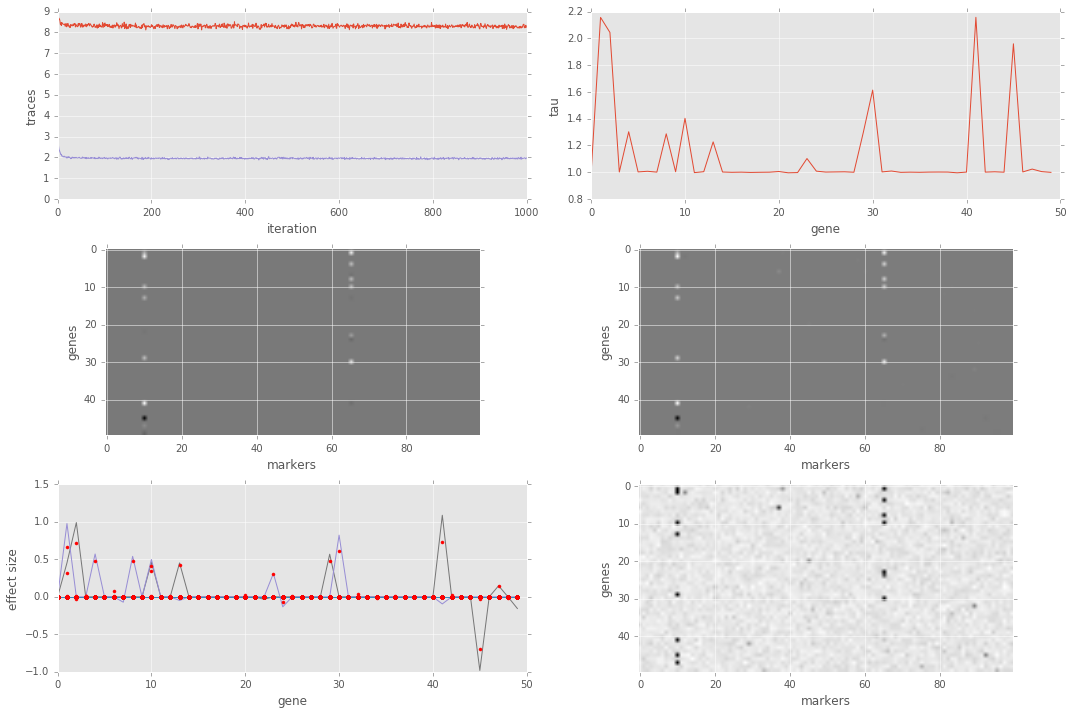

In [9]:
_plt.figure(figsize = (15,10));
_plt.subplot(3,2,1); _plt.plot(res['traces'][1:,:]); _plt.xlabel('iteration'); _plt.ylabel('traces')
_plt.subplot(3,2,2); _plt.plot(res['tau_mean']); _plt.xlabel('gene'); _plt.ylabel('tau')
_plt.subplot(3,2,3); _plt.imshow(data_pheno['coefs'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes')
_plt.subplot(3,2,4); _plt.imshow(res['beta_mean'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes');
_plt.subplot(3,2,5); _plt.plot(data_pheno['coefs']); _plt.plot(res['beta_mean'], '.r'); _plt.xlabel('gene'); _plt.ylabel('effect size')
_plt.subplot(3,2,6); _plt.imshow(res['zeta_mean'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes');
_plt.tight_layout()